In [1]:
%matplotlib notebook

import pandas as pd

df = pd.read_csv('reviews.csv')

df.loc[df['artist'] == 'explosions in the sky']

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
977,21686,1396,the wilderness,http://pitchfork.com/reviews/albums/21686-the-...,8.0,0,brandon stosuy,contributor,2016-03-28,0,28,3,2016,21686,Explosions in the Sky are the kind of band tha...,rock,temporary residence,explosions in the sky
6724,15327,9392,"take care, take care, take care",http://pitchfork.com/reviews/albums/15327-take...,7.2,0,joe tangari,contributor,2011-04-25,0,25,4,2011,15327,"Four years ago, Explosions in the Sky ended th...",rock,temporary residence,explosions in the sky
11712,9916,16796,all of a sudden i miss everyone,http://pitchfork.com/reviews/albums/9916-all-o...,6.0,0,brian howe,contributor,2007-02-19,0,19,2,2007,9916,While alphabetized post-rock record collection...,rock,temporary residence,explosions in the sky
13107,2882,19260,the rescue (travels in constants vol. 21),http://pitchfork.com/reviews/albums/2882-the-r...,7.2,0,cory d. byrom,NaN,2005-12-07,2,7,12,2005,2882,Thanks to a series of phenomenal albums and a ...,rock,temporary residence,explosions in the sky
13259,2881,19489,"how strange, innocence",http://pitchfork.com/reviews/albums/2881-how-s...,7.9,0,sam ubl,NaN,2005-10-23,6,23,10,2005,2881,If you wonder why Explosions in the Sky can be...,rock,self-released,explosions in the sky
14394,2880,21123,friday night lights ost,http://pitchfork.com/reviews/albums/2880-frida...,5.5,0,sam ubl,NaN,2004-11-07,6,7,11,2004,2880,"Located amid arid desert sprawl, Odessa, Texas...",rock,hip-o,explosions in the sky
15412,2879,22682,the earth is not a cold dead place,http://pitchfork.com/reviews/albums/2879-the-e...,7.7,0,hartley goldstein,NaN,2003-11-30,6,30,11,2003,2879,When the Texas quartet Explosions in the Sky r...,rock,temporary residence,explosions in the sky
17368,2878,25575,"those who tell the truth shall die, those who ...",http://pitchfork.com/reviews/albums/2878-those...,8.9,0,kevin adickes,NaN,2001-12-18,1,18,12,2001,2878,Most of us spend our lives sleepwalking throug...,rock,temporary residence,explosions in the sky


# Pre-processing

## Removal of rows without review content

In [2]:
df.isna().sum()

reviewid             0
Unnamed: 0           0
title                2
url                  0
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
reviewid.1           0
content             10
genre             2364
label               47
artist               2
dtype: int64

In [3]:
df = df.dropna(subset=['content'])
df.isna().sum()

reviewid             0
Unnamed: 0           0
title                2
url                  0
score                0
best_new_music       0
author               0
author_type       3901
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
reviewid.1           0
content              0
genre             2363
label               47
artist               2
dtype: int64

## Text cleaning

In [4]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
print('stopwords: ', stop)

#df.describe()


def count_stopwords(reviews):
    reviews['stopwords'] = reviews['content'].apply(lambda x: len([x for x in x.split() if x in stop]))

def count_words(reviews):
    reviews['words'] = reviews['content'].apply(lambda x: len([x for x in x.split()]))


def clean_text(reviews):
    # lower case
    reviews['cleaned_content'] = reviews['content'].str.lower()

    count_stopwords(reviews)
    
    # remove stopwords
    #reviews['cleaned_content'] = reviews['cleaned_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))    

    #remove punctuation
    reviews['cleaned_content'] = reviews['cleaned_content'].str.replace('[^\w\s]','')
    
    #remove digits
    reviews['cleaned_content'] = reviews['cleaned_content'].str.replace('\d+','')
    
    #remove accents
    reviews['cleaned_content'] = reviews['cleaned_content'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    
    count_words(reviews)
    
clean_text(df)
#print( df[['stopwords','words']][:5])

stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

## Tokenization

In [5]:
import nltk
from collections import Counter

df['tokens'] = df['cleaned_content'].apply(nltk.word_tokenize)

## Exploratory Data Analysis

<IPython.core.display.Javascript object>


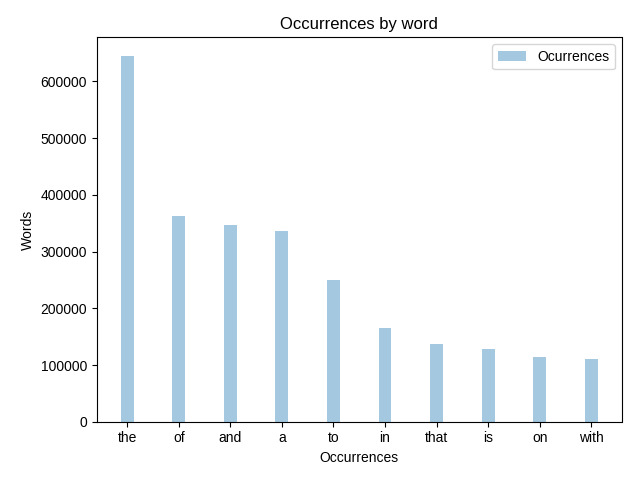

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

freq_words = Counter(" ".join(df["cleaned_content"]).split()).most_common(100)

data = freq_words[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


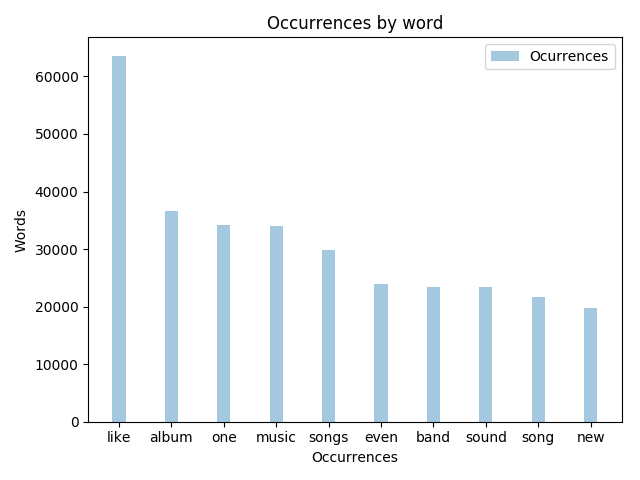

In [8]:
content_without_stopwords = df['cleaned_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))    

freq_words = Counter(" ".join(content_without_stopwords).split()).most_common(100)

data = freq_words[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

# Vectorization

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["cleaned_content"].tolist()
list_labels = df["score"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# TSNE

In [41]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np


X = df.drop(['score'],axis=1)
X = df.head(1000)

y = df['score'].head(1000)
y = y.values

tsne = TSNE(n_components=2, random_state=0)

#X_2d = tsne.fit_transform(X.values)
target_ids = range(len((df.score.apply(np.floor).unique())))
a = [str(int(i)) for i in df.score.apply(np.floor).unique()]
print(a)
'''
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, ('NÃO PAGOU', 'PAGOU')):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()
'''

NameError: name 'load_corpus' is not defined

In [35]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    #new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/home/joaorobson/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


<IPython.core.display.Javascript object>


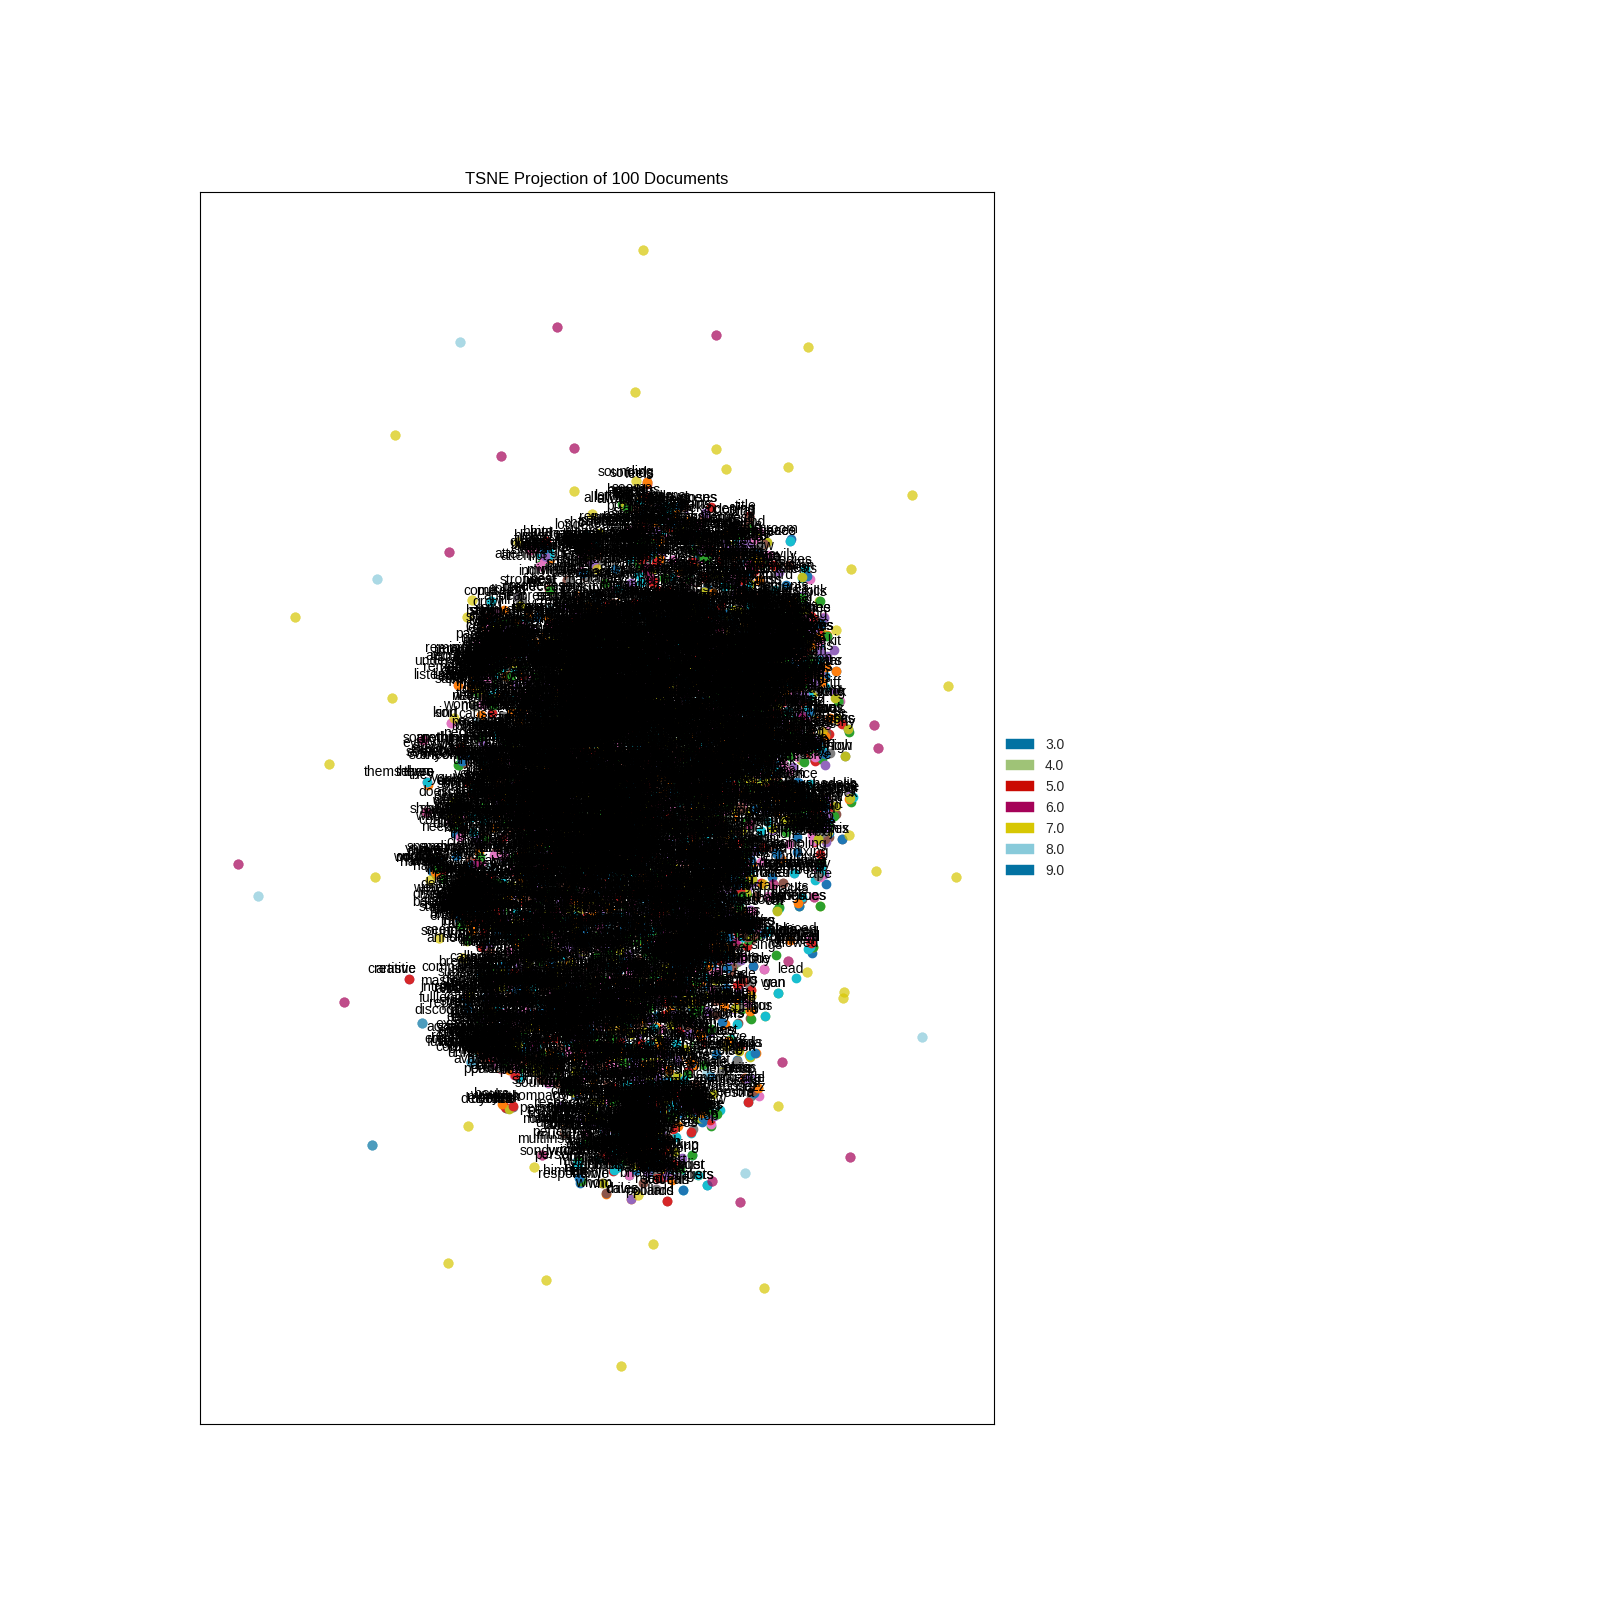

In [36]:
tsne_plot(model)
